# Смертность от COVID-19
Я взял смертность от ДТП в России за 2018 год (единственный источник ежедневной смертности в РФ более-менее свежей давности) и решил сравнить с ежедневной смертностью в Китае, США, Италии — странах, которые на слуху. Добавил статистику России, чтобы можно было сравнивать и смотреть ежедневные изменения. Данные по COVID-19 я беру с [GitHub университета Хопкинса](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series) — они обновляются ежедневно. Данные ДТП я скачал с [безопасныедороги.рф](https://xn--80abhddbmm5bieahtk5n.xn--p1ai/opendata), их пришлось преобразовать, чтобы увидеть наложение двух источников.
## Зачем?
Когда я вижу статистику у меня невольно возникает желание сравнить её с чем-то привычным. Необходимо понять — тревожный это сигнал или нет. Смертность от ДТП явление трагичное, но уже привычное обществу, а страх перед COVID-19 явление новое и навязчиво транслируется по всем возможным каналам. Естественно, возникает желание усомниться в угрозе невидимого вируса, задаться вопросом, а почему мы не применяем жёстких запретительных мер направленных на снижение смертности от ДТП.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv('data-20190801T0332-structure-20180314T1826.csv')

In [3]:
death = df.groupby(['crash_date'])['fatalities_amount'].agg('sum')
deathvalues = death.values

In [4]:
data = death.index.values

In [5]:
time = pd.to_datetime(data, format='%Y%m%d', errors='ignore') + timedelta(days = 366*2)

In [6]:
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [7]:
world = pd.read_csv(url)
world = world.set_index('Country/Region')
world = world.loc[['US','Italy', 'Russia','China']]
world = world.drop(columns=['Province/State','Lat','Long'])

In [8]:
world = world.groupby(level=0).sum()

In [9]:
world = world.T
world = world.diff()

In [10]:
world_time = world.index
world_time = [w.replace('/20', '/2020') for w in world_time]
world_time = [w.replace('/2020/', '/20/') for w in world_time]
world_time = pd.to_datetime(world_time, format='%m/%d/%Y')

In [11]:
now = datetime.datetime.now().strftime('%Y%m%d%H%M')

In [12]:
plt.rcParams['font.sans-serif'] = 'Consolas'

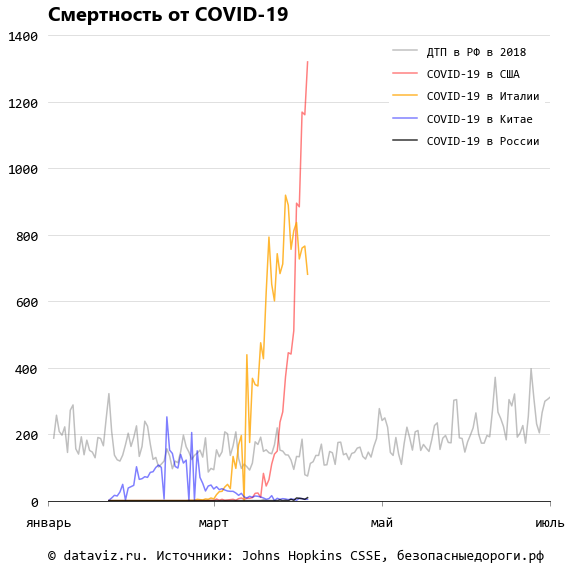

In [18]:
fig = plt.figure(
    figsize=(9, 8.56),
    facecolor='white'
)
ax = fig.add_subplot()
ax.plot(time, deathvalues, label = 'ДТП в РФ в 2018', c = 'gray', alpha = .5)
ax.plot(world_time, world[['US']], label = 'COVID-19 в США', c = 'red', alpha = .5)
ax.plot(world_time, world[['Italy']], label = 'COVID-19 в Италии', c = 'orange', alpha = .8)
ax.plot(world_time, world[['China']], label = 'COVID-19 в Китае', c = 'blue', alpha = .5)
ax.plot(world_time, world[['Russia']], label = 'COVID-19 в России', c = 'black', alpha = .8)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.tick_params(axis="x", length=5, pad=10, labelsize = 14, color = 'grey') 
ax.tick_params(axis="y", length=0, pad=10, labelsize = 14)
ax.set_xticks(['2020-01-01', '2020-03-01','2020-05-01','2020-07-01','2020-09-01','2020-11-01', '2021-01-01'])
ax.set_xticklabels(['январь', 'март','май','июль','сентябрь','ноябрь', 'январь'], )
ax.grid(axis = 'y', color = 'grey', alpha = .3)
ax.axhline(y = 0, color = 'black', linewidth=1)
ax.set_ylim(0, 1400)
ax.set_xlim('2020-01-01','2020-07-01')
ax.set_title('Смертность от COVID-19', fontname = "Segoe UI", fontweight = 'bold', fontsize=20, loc='left',pad=15)
credit_x = ax.get_xlim()[0]
credit_y = 0 - ax.get_ylim()[1]/8 
size1 = (ax.get_ylim()[1] - ax.get_ylim()[0])
size2 = size1/10
ax.text(credit_x, credit_y, ('© dataviz.ru. Источники: Johns Hopkins CSSE, безопасныедороги.рф'), fontsize=14)
ax.patch.set_facecolor('white')
ax.legend(loc='upper right', labelspacing = 1, edgecolor = 'white', framealpha = 1, fontsize = 12)
fig.savefig('COVID19_deaths_'+ now + '.png', dpi=300, transparent = False, bbox_inches = 'tight', pad_inches = .5, facecolor = 'white')

plt.show()

## Вывод
Статистика смертности в Китае едва достигает смертности от ДТП в России в 2018 году, но смертность США и Италии выглядит пугающе. Россия только в самом начале эпидемии и многое зависит от защитных мер и поведения населения. Самоизоляция и дисциплина может спасти тысячи жизней. Вот если бы россияне были такими же дисциплинированными за рулём. Вот если бы сценарий эпидемии в России не был похож на США и Италию.
## PS
Да, я осознаю, что есть "ложь, большая ложь и статистика" и не помешает держать в голове, что каждая страна по разному относится к публикации открытых данных, статистика может утаиваться по массе корыстных причин.